# UYG332 - IMAGE PROCESSING FINAL PROJECT 

### Libraries and referenes used:
- OpenCV to process images
- NumPy (for math operations), Matplotlib (displaying the plots in images)
- Youtube, Reddit, and ChatGPT were used to help with some codes, it will be specified when used.


# - Problems and their solutions -

## Problem - 1 (15 points)
### Task : use the image named as tf2_engineer.jpg to do the following 
1. Read and display the original image in colour.
2. Find the centre of the image (𝑦꜀, 𝑥꜀) and print the intensity value at the centre.
3. Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels;
width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8
4. Print the intensity value at the centre of the colour patch.
5. Display the new image with colour patch.

center of the image (y, x):((92, 92))
pixel value of the center:[168 158  50]
intensity value at the centre:[168 158  50]


(np.float64(-0.5), np.float64(183.5), np.float64(183.5), np.float64(-0.5))

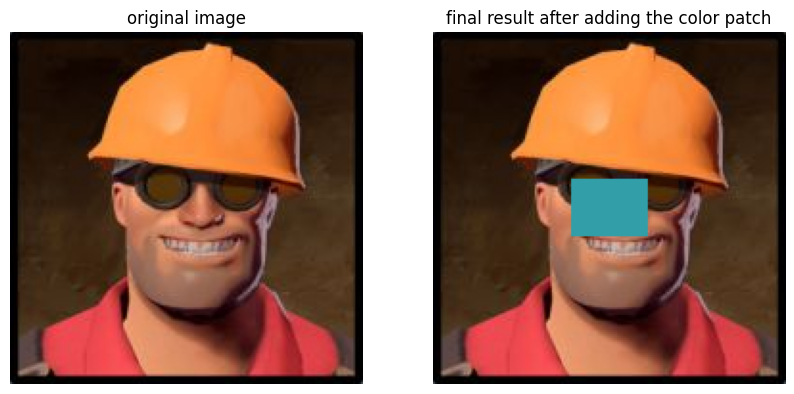

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading the image
engineerpic = cv2.imread("tf2_engineer.jpg")

# displaying the image before changes
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(engineerpic.copy(), cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.axis('off')

width, height, _ = engineerpic.shape
centerX = width // 2
centerY = height // 2
pixelcenter = engineerpic[centerY, centerX]

patchWidth = 40
patchHeight = 30
patchColor = (168,158,50) # BGR format for hex color #329ea8

# calculation of the rectangle's corners and filling the patch in with the color
x1 = centerX - patchWidth // 2
x2 = centerX + patchWidth // 2
y1 = centerY - patchHeight // 2
y2 = centerY + patchHeight // 2
engineerpic[y1:y2, x1:x2] = patchColor

print(f"center of the image (y, x):({centerY, centerX})")
print(f"pixel value of the center:{pixelcenter}")
print(f"intensity value at the centre:{engineerpic[centerY, centerX]}")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(engineerpic, cv2.COLOR_BGR2RGB))
plt.title("final result after adding the color patch")
plt.axis('off')

## Problem - 2 (15 points)
### Task : use the image named as einstein.tiff to do the following 
1. Read and display the original image in grayscale.
2. Find the negative of the input image.
3. Display the negative image.
4. From the original image get the intensity value of 5 random pixels, and from the negative image
get the intensity value of same pixels. Print pixel values to show pixel values before and after

pixel intensity comparison (original vs negative):

pixel (629, 559), before: 95, after: 160
pixel (763, 192), before: 100, after: 155
pixel (9, 359), before: 112, after: 143
pixel (754, 277), before: 102, after: 153
pixel (70, 599), before: 100, after: 155


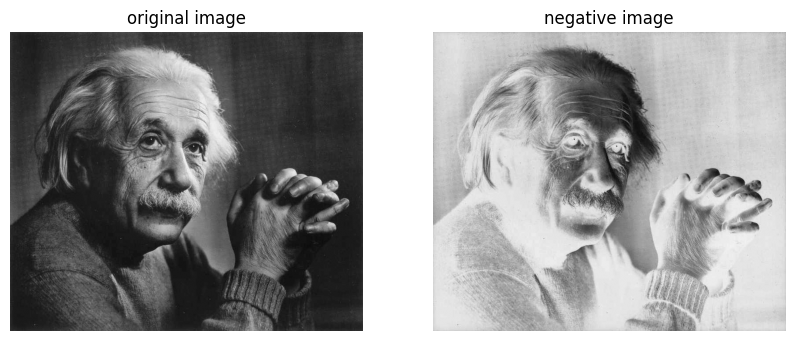

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading the image in grayscale
eintsteinpic = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)
negativeimg = 255 - eintsteinpic

# displaying the original image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(eintsteinpic, cmap='gray')
plt.title("original image")
plt.axis('off')

# displaying after changes
plt.subplot(1, 2, 2)
plt.imshow(negativeimg, cmap='gray')
plt.title("negative image")
plt.axis('off')

# random comparision of pixels
np.random.seed(0)
# getting the image dimensions
rows, columns = eintsteinpic.shape
# generating 5 random pixels'coordinates 
randomcoordinates = [(np.random.randint(rows), np.random.randint(columns)) for _ in range(5)]

print("pixel intensity comparison (original vs negative):\n")

# for loop to loop through the coordinate, then printing the original and negative intensities
for y, x in randomcoordinates:
    print(f"pixel ({x}, {y}), before: {eintsteinpic[y,x]}, after: {negativeimg[y,x]}")


## Problem - 3 (15 points)
### Task : use the image named as pout.tiff to do the following 
1. Read and display the original image in grayscale.
2. Apply log transform to original image and display the result.
3. Apply inverse log transform to original image and display the result.
4. Apply inverse log transform to image you get from step 2 and display the result.
5. Comment on the images you get from step 2 and step 4

(np.float64(-0.5), np.float64(239.5), np.float64(290.5), np.float64(-0.5))

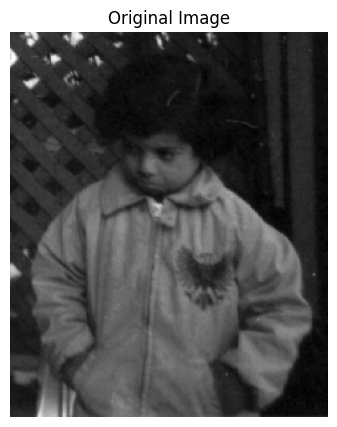

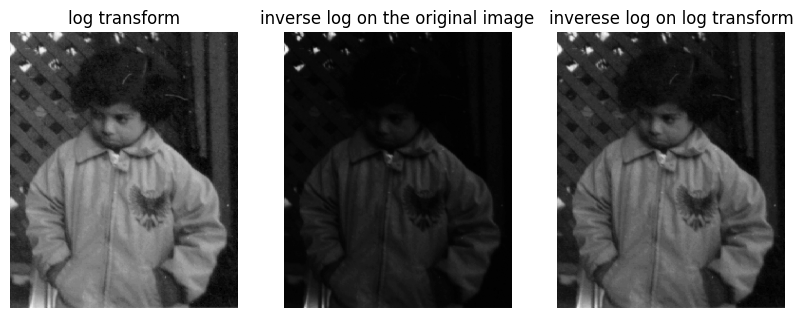

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# reading the image in grayscale
poutpic = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# displaying the original image 
plt.figure(figsize=(5, 5))
plt.imshow(poutpic, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# calculatingg the scaling constant for tranforms
constant = 255 / np.log(1 + np.max(poutpic))

# 2. applying log transform
logtransform = constant * np.log1p(poutpic)
logtransform = np.uint8(logtransform)

# 3. applying inverse log to original
inverselog_original = np.exp(poutpic / constant) - 1
inverselog_original = np.uint8(inverselog_original)

# 4. applying inverse log to log-transformed image
inverselog_transform = np.exp(logtransform / constant) - 1
inverselog_transform = np.uint8(inverselog_transform)

plt.figure(figsize=(10, 10))

# log transform
plt.subplot(1, 3, 1)
plt.imshow(logtransform, cmap='gray')
plt.title('log transform')
plt.axis('off')
# comments: slightly lighter than the original because log tranforms enhances dark regions

# inverse log of original
plt.subplot(1, 3, 2)
plt.imshow(inverselog_original, cmap='gray')
plt.title('inverse log on the original image')
plt.axis('off')

# inverse log on the log tranform
plt.subplot(1, 3, 3)
plt.imshow(inverselog_transform, cmap='gray')
plt.title('inverese log on log transform')
plt.axis('off')
#comments on step 4: very similar to original (perfect invertibility)


## Problem - 4 (15 points)
### Task : use the image named as moon.tiff to do the following 
1. Read and display the original image in grayscale.
2. Apply unsharp masking in spatial domain using below formulation:
*g(x, y) = f(x, y) + k ∗ mask(x, y)*
You need to use three different 𝑘𝑘 values. You can select the value of 𝑘𝑘 arbitrarily.
3. Apply unsharp masking in frequency domain using below formulation:
*g(x, y) = F⁻¹ [1 + k ]
where ℱ−1is the inverse Fourier transform, 𝐻𝐻𝐻𝐻𝐻𝐻 is the high-pass filter function in frequency
domain, and 𝐹𝐹(. ) is the input image in frequency domain. You need to use three different 𝑘𝑘
values. You can select the value of 𝑘𝑘 arbitrarily (BUT use same 𝑘𝑘 values from the step 2).
Remember that when designing your high-pass filter, you need to select the 𝐷𝐷0 (cut-off
frequency). You can select the proper 𝐷𝐷0 by trial or analysing the original input image in
frequency domain. There is no ideal 𝐷𝐷0 and 𝑘𝑘 so while finding results, keep that in mind.
4. Display the result from the step 2 side by side with the result from the step 3 for each value of 𝑘𝑘.
Example: Fig-1 (k = 0.2), Fig-2 (k=0.5), Fig-3 (k=1)

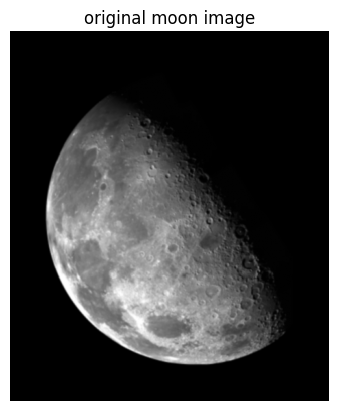

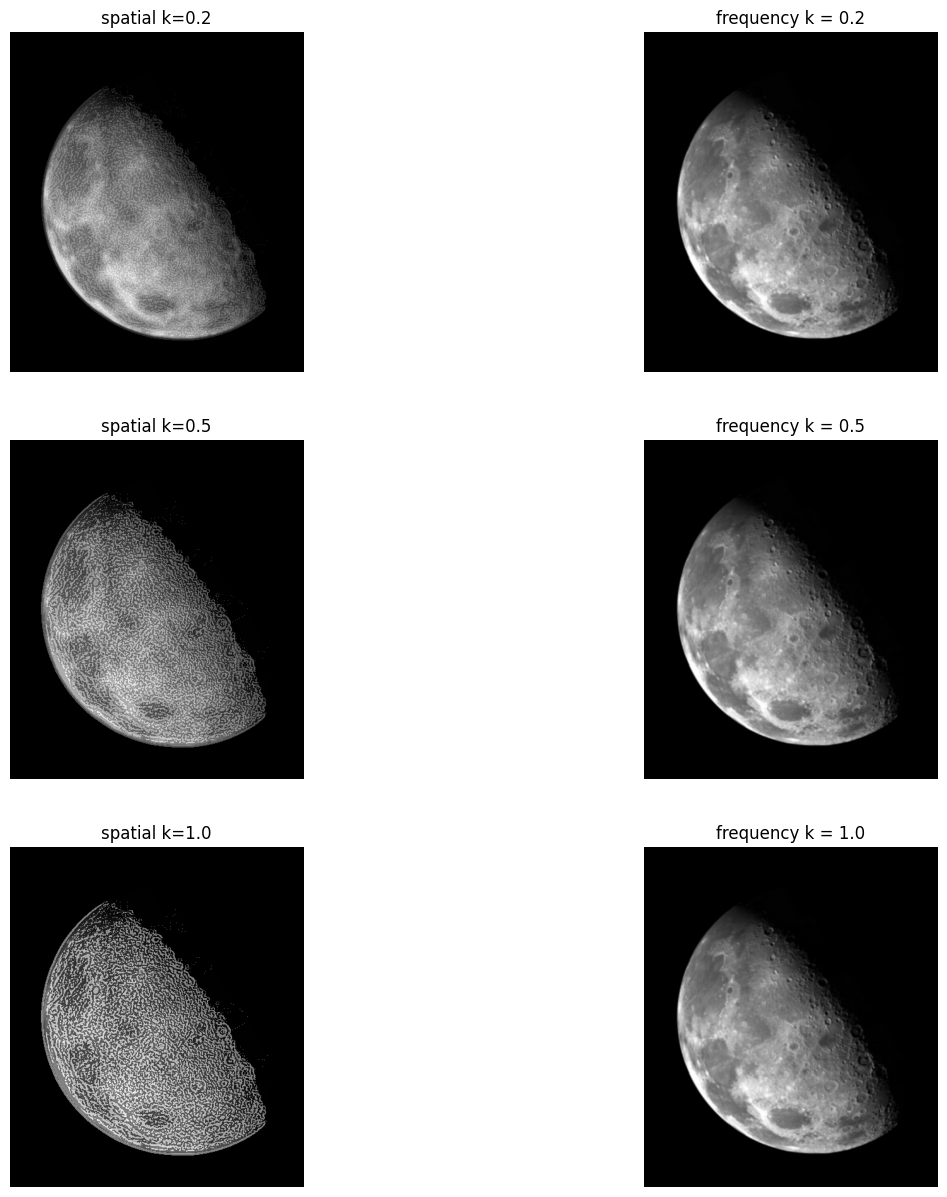

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading and displaying the grayscale image
moonpic = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
plt.figure(), plt.imshow(moonpic, cmap='gray')
plt.title('original moon image')
plt.axis('off')

k_values = [0.2, 0.5, 1.0]  
D0 = 250 

# unsharp masking: spatial domian
def spatial_unsharpening(img, k):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    mask = img - blur
    return img + k * mask

# unsharp masking; frequency domain
def frequency_unsharpening(img, k, D0):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    #creating the highpass filter
    rows, columns = img.shape
    centerrow, centercol = rows//2, columns//2
    highpass = np.ones((rows, columns), np.float32)
    highpass[centerrow - D0: centerrow + D0, centercol - D0 : centercol + D0] = 0
    
    # applying the filter and inverse transforms
    filtered = fshift * (1 + k * highpass)
    f_ishift = np.fft.ifftshift(filtered)
    return np.abs(np.fft.ifft2(f_ishift))

# displaying the comparisions
plt.figure(figsize=(15,15))

for i, k in enumerate(k_values):
    # result of spatial domain
    spatial = spatial_unsharpening(moonpic, k)
    plt.subplot(3, 2, 2 * i + 1)
    plt.imshow(spatial, cmap='gray')
    plt.title(f'spatial k={k}'), plt.axis('off')
    # result of frequency domain
    freq = frequency_unsharpening(moonpic, k, D0)
    plt.subplot(3, 2, 2 * i + 2)
    plt.imshow(freq, cmap='gray')
    plt.title(f'frequency k = {k}')
    plt.axis('off')

plt.show()



## Problem - 5 (15 points)
### Task : use the image named as pcb.tiff to do the following 
1. Read and display the original image in grayscale.
2. Identify and describe the type of noise (e.g., salt-and-pepper, Gaussian) using visual inspection
and/or statistical tools (e.g., histogram).
3. Remove the noise using proper filtering sequence

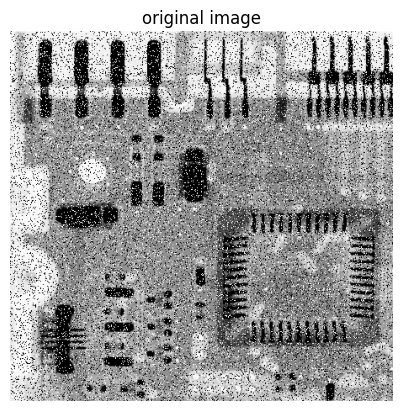

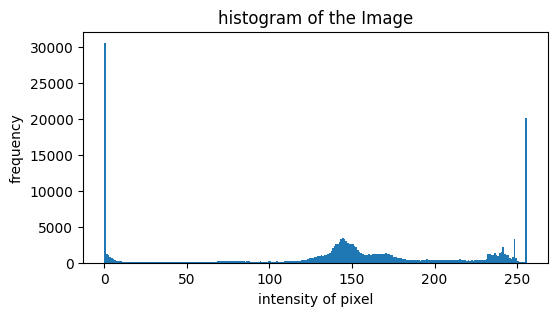

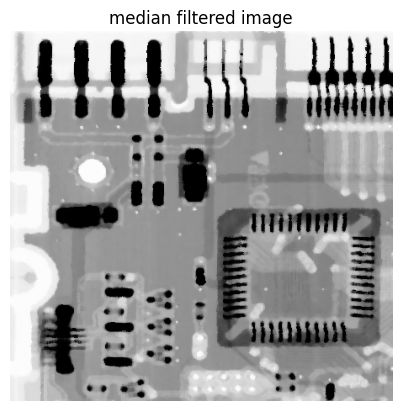

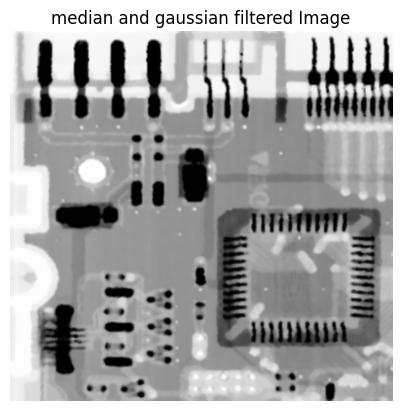

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# reading and displaying the original image
pcbtif = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(pcbtif, cmap='gray')
plt.title("original image")
plt.axis('off')
plt.show()

# histogram statistics
plt.figure(figsize=(6, 3))
plt.hist(pcbtif.ravel(), bins=256, range=[0,256])
plt.title("histogram of the Image")
plt.xlabel("intensity of pixel")
plt.ylabel("frequency")
plt.show()

# median filtering
medianfiltered = cv2.medianBlur(pcbtif, 5)
plt.imshow(medianfiltered, cmap='gray')
plt.title("median filtered image")
plt.axis('off')
plt.show()

# applying gaussian blur
gaussianfiltered = cv2.GaussianBlur(medianfiltered, (3,3), 0)
plt.imshow(gaussianfiltered, cmap='gray')
plt.title("median and gaussian filtered Image")
plt.axis('off')
plt.show()


## Problem - 6 (25 points)
### Task : use the image named as pollen.tiff to do the following 
1. Read and display the original image in grayscale.
2. Comment on the problem presented at that image. While commenting on the problem, provide
proofs (numerical, visual, statistical etc.).
3. Use two independent approaches to solve the problem.
4. For each solution, display the results.
5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).

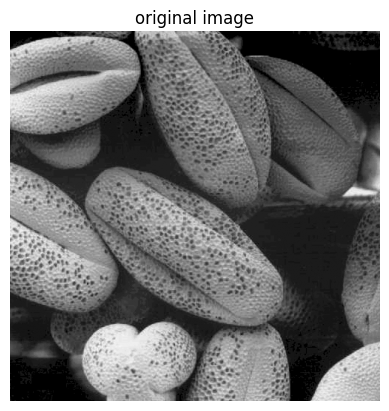

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# reading and displaying the original pollen image
pollenpic = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(pollenpic, cmap='gray')
plt.title("original image")
plt.axis('off')
plt.show()